# Titanic
_Thibaud Perrin_  
_Started: 14/02/2022_

## Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from matplotlib import pyplot
import os

## Files

In [2]:
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/test.csv
./data/train.csv
./data/gender_submission.csv


## Loading data
#### Train.csv

In [3]:
train_data = pd.read_csv("./data/train.csv")
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

#### Test.csv

In [4]:
test_data = pd.read_csv("./data/test.csv")
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

## Data exploration

In [5]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [6]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [7]:
list(train_data.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [8]:
def filterNan(df):
    df[['Embarked']] = df[['Embarked']].fillna(value='N')
    df[['Age']] = df[['Age']].fillna(value=0.0)
    df[['Cabin']] = df[['Cabin']].fillna(value='C_NaN')
    df[['Fare']] = df[['Fare']].fillna(value=0.0)
    df[df.isna().any(axis=1)]
    return df

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_N', 'Embarked_Q', 'Embarked_S']
Feature:     Pclass, 	 Score: 0.08648
Feature:        Age, 	 Score: 0.24545
Feature:      SibSp, 	 Score: 0.04782
Feature:      Parch, 	 Score: 0.04721
Feature:       Fare, 	 Score: 0.25519
Feature: Sex_female, 	 Score: 0.15073
Feature:   Sex_male, 	 Score: 0.13593
Feature: Embarked_C, 	 Score: 0.01212
Feature: Embarked_N, 	 Score: 0.00005
Feature: Embarked_Q, 	 Score: 0.00630
Feature: Embarked_S, 	 Score: 0.01271


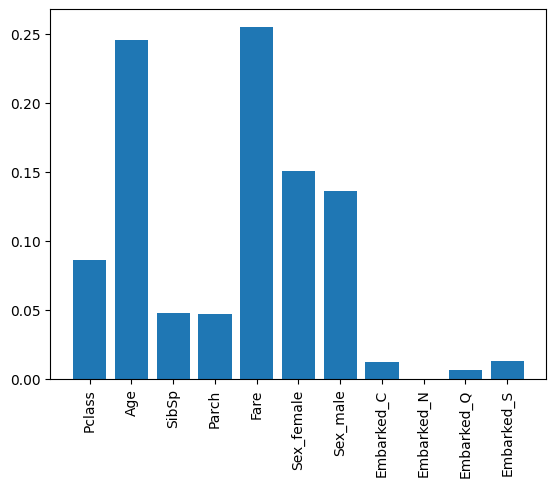

7 most importantes features = 97%
Feature:      Parch, 	 Score: 0.04721
Feature:      SibSp, 	 Score: 0.04782
Feature:     Pclass, 	 Score: 0.08648
Feature:   Sex_male, 	 Score: 0.13593
Feature:        Age, 	 Score: 0.24545
Feature:       Fare, 	 Score: 0.25519
Feature: Sex_female, 	 Score: 0.15073


In [9]:
# define labels
y_i = train_data["Survived"]

# define dataset
features_i = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
df_i = filterNan(train_data)
df_i_test = filterNan(test_data)
X_i = pd.get_dummies(df_i[features_i])
X_test_i = pd.get_dummies(df_i_test[features_i])
feature_names = list(X_i.keys())
print(feature_names)

# define the model
model = RandomForestClassifier()

# fit the model
model.fit(X_i, y_i)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %10s, \t Score: %.5f' % (feature_names[i],v))

# plot feature importance
pyplot.xticks(rotation='vertical')
pyplot.bar(feature_names, importance)
pyplot.show()

# Most importance features
n = 7
ind = np.argpartition(importance, -n)[-n:]
print(f"{n} most importantes features = {round(np.sum(importance[ind])*100)}%")
for imp, name in zip(importance[ind], np.array(feature_names)[ind]):
    print('Feature: %10s, \t Score: %.5f' % (name, imp))

## Random Forest

In [10]:
y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Age", "Fare", "Parch"]
df = filterNan(train_data)
df_test = filterNan(test_data)
X = pd.get_dummies(df[features])
X_test = pd.get_dummies(df_test[features])
feature_names = list(X.keys())

model = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Sex': test_data.Sex, 'Survived': predictions})
output.to_csv('./output/submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## Load Results

In [11]:
output_data = pd.read_csv("./output/submission.csv")
output_data.head()

PassengerId     Sex  Survived
0          892    male         0
1          893  female         0
2          894    male         0
3          895    male         0
4          896  female         0

### Checking output

In [12]:
women = output_data.loc[output_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7960526315789473


In [13]:
men = output_data.loc[output_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.05639097744360902


### Save for submission

In [14]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('./output/submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## Vizualisation

In [15]:
# Extract single tree
estimator = model.estimators_[0]
# Export as dot file
export_graphviz(estimator, 
                out_file='./output/tree.dot', 
                feature_names = list(X_test.keys()),
                class_names = ['Not survived', 'Survived'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [16]:
# Convert to png
from subprocess import call
call(['dot', '-Tpng', './output/tree.dot', '-o', './output/tree.png', '-Gdpi=600'])

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.859462 to fit


0

In [17]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = './output/tree.png')

In [18]:
test_data.loc[test_data['PassengerId'] == 892]

PassengerId  Pclass              Name   Sex   Age  SibSp  Parch  Ticket  \
0          892       3  Kelly, Mr. James  male  34.5      0      0  330911   

     Fare  Cabin Embarked  
0  7.8292  C_NaN        Q

In [19]:
X_test2 = pd.get_dummies(test_data[features + ['PassengerId']])
X_test2.loc[X_test2['PassengerId'] == 892]

Pclass  SibSp   Age    Fare  Parch  PassengerId  Sex_female  Sex_male
0       3      0  34.5  7.8292      0          892           0         1

In [22]:
X_train2 = pd.get_dummies(train_data[features + ['PassengerId']])
X_train2.loc[X_train2['PassengerId'] == 2]

Pclass  SibSp   Age     Fare  Parch  PassengerId  Sex_female  Sex_male
1       1      1  38.0  71.2833      0            2           1         0